In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style('whitegrid')


In [2]:
## Path
file = './Data/Small_Data/online_orders.json'

In [22]:
## Carregar Arquivo (customer_id e visitor_id como string para evitar notação cientifica)
df = pd.read_json(file, lines=True, dtype={'visitor_id':str,'customer_id': str})

# 1.0 - Exploratory Data Analysis | Análise Exploratória de Dados

In [23]:
df.head(10)

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
0,2018-08-01,3663323563643832383039356,desktop,363063373630306,323762666337343,1,839,None
1,2018-08-01,3430316531623964316332613,mobile,356664366366353,313562333039323,1,629,63393337303931353431
2,2018-08-01,3261343261306231336437393,desktop,313432656633333,383863346531623,1,219,37653631373639353439
3,2018-08-01,6437386532653732323563656,mobile,633236633438383,666136386663626,1,239,65333830303066373165
4,2018-08-01,6264656662326430346661616,desktop,623030326130383,626533383465323,1,69,None
5,2018-08-01,6638653965656263613238623,desktop,343136663661646,366464333539333,1,298,None
6,2018-08-01,6438323963376433356532633,desktop,353131646163336,373163626265643,1,598,None
7,2018-08-02,3933383761663335353034373,mobile,636536353265386,356466373137383,1,1798,61306161303630373135
8,2018-08-02,6363363338623337663538353,mobile,363037313438636,383530353262626,1,428,62633265623261666566
9,2018-08-02,3761306638666637343734393,desktop,343238636534646,303936663162613,1,298,35623131306438343161


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12237 entries, 0 to 12236
Data columns (total 8 columns):
date             12237 non-null datetime64[ns]
visitor_id       12237 non-null object
deviceType       12237 non-null object
order_id         12237 non-null int64
on_product_id    12237 non-null int64
quantity         12237 non-null int64
price            12237 non-null int64
customer_id      7757 non-null object
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 764.9+ KB


In [46]:
df.customer_id.replace('None', np.nan, inplace=True)
df.visitor_id.replace('None', np.nan, inplace=True)

In [47]:
print('Dia Inicial:',df.date.min())
print('Dia Final:',df.date.max())

Dia Inicial: 2018-08-01 00:00:00
Dia Final: 2018-08-31 00:00:00


Periodo de coleta = Periodo offline (ok)

In [48]:
## Acessos
df.deviceType.value_counts()

mobile     6971
desktop    5266
Name: deviceType, dtype: int64

**Acesso Mobile > Acesso Desktop**

In [57]:
df[df.price==df.price.max()]

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
596,2018-08-15,3964346363373032643564653,mobile,353034336533306,633263646431626,1,11190,34366334393234303934
1854,2018-08-21,3731333664356630383162346,mobile,653465353366643,373236323565303,1,11190,35363233663665383639
8461,2018-08-15,3838383135656264386463313,desktop,346632663531363,373236323565303,1,11190,NaN
10814,2018-08-15,6336383764623038333638396,mobile,623864623164616,633263646431626,1,11190,61373536353465303639


### Que produto é esse que um item tem preço de 11190?

In [62]:
df.quantity.value_counts()

1    12209
2       26
3        2
Name: quantity, dtype: int64

# 2.0 - Preparation | Preparação

## 2.1 Data Cleaning - NaN | Limpeza de Dados - NaN

In [73]:
df.isnull().sum()

date                0
visitor_id          0
deviceType          0
order_id            0
on_product_id       0
quantity            0
price               0
customer_id      4480
dtype: int64

In [77]:
len(df.customer_id)

12237

**4480 NaN no customer_id column, pq existem compras online sem identificação de user?**  
**36% do costumer_id está vazio (valor alto)** 

In [79]:
## Drop valores null
no_null = df.copy()
no_null.dropna(axis=0, inplace=True)
no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7757 entries, 1 to 12236
Data columns (total 8 columns):
date             7757 non-null datetime64[ns]
visitor_id       7757 non-null object
deviceType       7757 non-null object
order_id         7757 non-null int64
on_product_id    7757 non-null int64
quantity         7757 non-null int64
price            7757 non-null int64
customer_id      7757 non-null object
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 545.4+ KB


In [85]:
## Reorganiza indices
no_null = no_null.reset_index().drop(columns=['index'])
no_null.head()

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
0,2018-08-01,3430316531623964316332613,mobile,356664366366353,313562333039323,1,629,63393337303931353431
1,2018-08-01,3261343261306231336437393,desktop,313432656633333,383863346531623,1,219,37653631373639353439
2,2018-08-01,6437386532653732323563656,mobile,633236633438383,666136386663626,1,239,65333830303066373165
3,2018-08-02,3933383761663335353034373,mobile,636536353265386,356466373137383,1,1798,61306161303630373135
4,2018-08-02,6363363338623337663538353,mobile,363037313438636,383530353262626,1,428,62633265623261666566


## 2.2 Data Cleaning - Outliers | Limpeza de Dados - Outliers

In [90]:
df.price.describe()

count    12237.000000
mean       461.047397
std        481.098790
min         19.000000
25%        209.000000
50%        359.000000
75%        569.000000
max      11190.000000
Name: price, dtype: float64

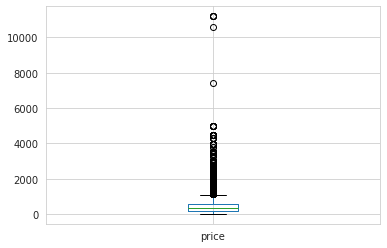

In [92]:
df.price.plot(kind='box')

**Mediana representa melhor que média**

In [96]:
df[df.price>5000]

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
596,2018-08-15,3964346363373032643564653,mobile,353034336533306,633263646431626,1,11190,34366334393234303934
1016,2018-08-16,3863393432663064653564393,mobile,643934386339343,656161613963633,1,7399,32383332626361303562
1854,2018-08-21,3731333664356630383162346,mobile,653465353366643,373236323565303,1,11190,35363233663665383639
8461,2018-08-15,3838383135656264386463313,desktop,346632663531363,373236323565303,1,11190,NaN
10814,2018-08-15,6336383764623038333638396,mobile,623864623164616,633263646431626,1,11190,61373536353465303639
11576,2018-08-15,6230376437366531633061373,mobile,373131333539306,616637363432393,1,10590,NaN


## 2.3 Data Cleaning - Duplicated | Limpeza de Dados - Duplicados 

In [98]:
df.duplicated().sum()

0

**Não existem linhas completamente duplicadas e a duplicidade de valores individuais não são problema**

## 2.4 - Adicionar Coluna de dia da Semana

In [234]:
df['weekday'] = df['date'].dt.dayofweek

# 3.0 - Análises

In [235]:
df.head()

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id,weekday
0,2018-08-01,3663323563643832383039356,desktop,363063373630306,323762666337343,1,839,NaN,2
1,2018-08-01,3430316531623964316332613,mobile,356664366366353,313562333039323,1,629,63393337303931353431,2
2,2018-08-01,3261343261306231336437393,desktop,313432656633333,383863346531623,1,219,37653631373639353439,2
3,2018-08-01,6437386532653732323563656,mobile,633236633438383,666136386663626,1,239,65333830303066373165,2
4,2018-08-01,6264656662326430346661616,desktop,623030326130383,626533383465323,1,69,NaN,2


## 3.1 - Produtos

In [236]:
df.on_product_id.value_counts()

626664333563363    74
656136316465643    50
376531636530353    50
396464373131666    47
393665363031353    45
                   ..
643161333961346     1
656535323731333     1
626331343133353     1
383432356665383     1
313232346634653     1
Name: on_product_id, Length: 2184, dtype: int64

In [237]:
mais_comprados = df.on_product_id.value_counts().head(5).index

In [245]:
grupo_comprados = df[df.on_product_id.isin(mais_comprados)].groupby(['on_product_id', 'deviceType']).sum().reset_index()

In [246]:
grupo_comprados.head()

,on_product_id,deviceType,order_id,quantity,price,weekday
0,376531636530353,desktop,6809029581404060,16,3984,47
1,376531636530353,mobile,14271754127948200,35,8466,124
2,393665363031353,desktop,7475794916564745,18,2842,43
3,393665363031353,mobile,12346978544730216,27,4423,81
4,396464373131666,desktop,6296472043103964,13,1167,36


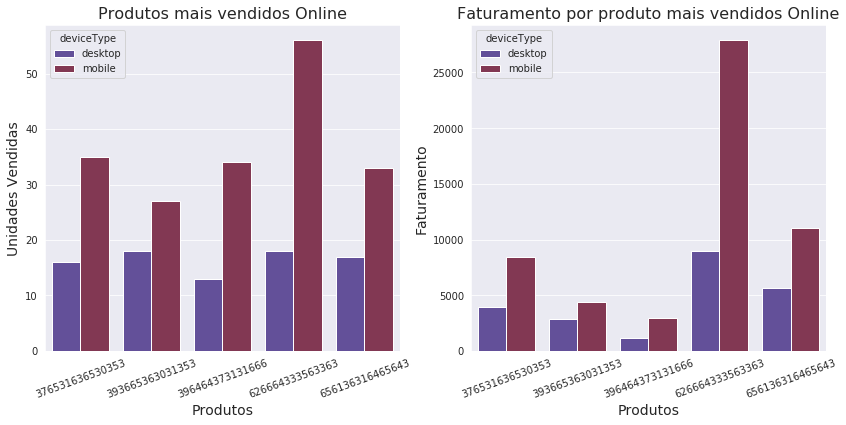

In [430]:
## Plots para os produtos mais vendidos
fig, ax = plt.subplots(1,2,figsize=(14,6),sharex=True)

ax2 = sns.barplot(x='on_product_id',y='price', hue='deviceType',data=grupo_comprados,palette='twilight')
ax2.set_xlabel('Produtos', fontsize=14)
ax2.set_ylabel('Faturamento', fontsize=14)
ax2.set_title('Faturamento por produto mais vendidos Online', fontsize=16)


ax1 = sns.barplot(x='on_product_id',y='quantity',hue='deviceType' ,data=grupo_comprados, palette='twilight', ax=ax[0])
ax1.set_xlabel('Produtos', fontsize=14)
ax1.set_ylabel('Unidades Vendidas', fontsize=14)
ax1.set_title('Produtos mais vendidos Online', fontsize=16)


for item in ax1.get_xticklabels():
    item.set_rotation(20)


for item in ax2.get_xticklabels():
    item.set_rotation(20)

    
## Salva a figura
plt.savefig('./Images/Online/Most-Sold.jpg', bbox_inches="tight")

**Produto mais vendido id=626664333563363**  
**Faturamento total de 36852**

### 3.11 - Produto Mais Vendido

In [293]:
most_sold = df[df.on_product_id.isin(df.on_product_id.value_counts().head(1).index)]
most_sold.date.value_counts()

2018-08-18    21
2018-08-17    17
2018-08-16    16
2018-08-22    10
2018-08-21     4
2018-08-19     4
2018-08-20     1
2018-08-23     1
Name: date, dtype: int64

In [294]:
most_sold_dates = most_sold.groupby('date').sum().reset_index()

In [295]:
most_sold_dates

,date,order_id,on_product_id,quantity,price,weekday
0,2018-08-16,6982776855061945,10026629337013808,16,7968,48
1,2018-08-17,7145108018386299,10653293670577172,17,8466,68
2,2018-08-18,10404835958156756,13159951004830628,21,10458,105
3,2018-08-19,2247019703169678,2506657334253452,4,1992,24
4,2018-08-20,393237313463656,626664333563363,1,498,0
5,2018-08-21,2342563993277691,2506657334253452,4,1992,4
6,2018-08-22,4715637046276635,6266643335633630,10,4980,20
7,2018-08-23,336139336365353,626664333563363,1,498,3


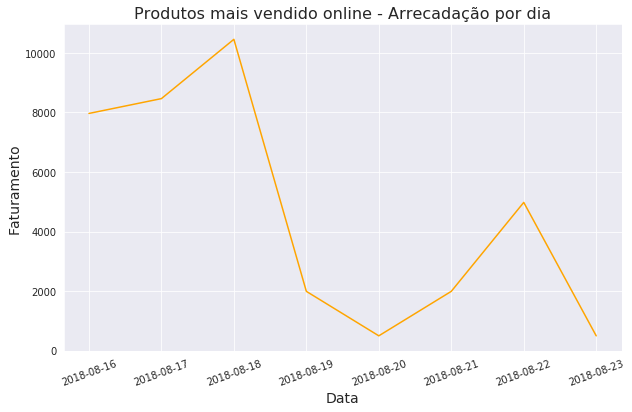

In [435]:
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(x='date',y='price',data=most_sold_dates, color='orange')
ax1.set_xlabel('Data', fontsize=14)
ax1.set_ylabel('Faturamento', fontsize=14)
ax1.set_title('Produtos mais vendido online - Arrecadação por dia', fontsize=16)

for item in ax1.get_xticklabels():
    item.set_rotation(20)
    
plt.savefig('./Images/Online/Top-Sold.jpg', bbox_inches="tight")

**Percebe-se que o produto foi vendido apenas em uma semana com dois picos de vendas**  
**Possivelmente uma promoção tenha acontecido?**

## 3.3 - Clientes (ver quais clientes compram off que tambem compram on)

## 3.2 - Faturamento  
**Hipótes**      
**Os IDs dos clientes faltantes no DF completo são devidos à algum problema na coleta APENAS do ID do cliente, logo isso nao influência o faturamento**  
  
**Caso essa ausência de valor esteja ligada à algum tipo de problema que possa comprometer o restante dos dados, o melhor seria a utilização do dataframe sem os valores nulos**

In [304]:
df.head()

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id,weekday
0,2018-08-01,3663323563643832383039356,desktop,363063373630306,323762666337343,1,839,NaN,2
1,2018-08-01,3430316531623964316332613,mobile,356664366366353,313562333039323,1,629,63393337303931353431,2
2,2018-08-01,3261343261306231336437393,desktop,313432656633333,383863346531623,1,219,37653631373639353439,2
3,2018-08-01,6437386532653732323563656,mobile,633236633438383,666136386663626,1,239,65333830303066373165,2
4,2018-08-01,6264656662326430346661616,desktop,623030326130383,626533383465323,1,69,NaN,2


In [308]:
print('Faturamento Total: R$',df.price.sum())

Faturamento Total: R$ 5641837


In [312]:
## Faturamento com o tempo
fat_time = df.groupby('date').sum().reset_index()
fat_time.head()

,date,order_id,on_product_id,quantity,price,weekday
0,2018-08-01,62332467930034456,57728149068614960,129,61457,258
1,2018-08-02,57670464914675352,54453212401322008,121,68783,363
2,2018-08-03,72794361954401888,78020323302989328,166,111722,664
3,2018-08-04,91280873183587424,90278325993415728,193,75734,965
4,2018-08-05,80799198874337104,72147762617114160,162,73634,972


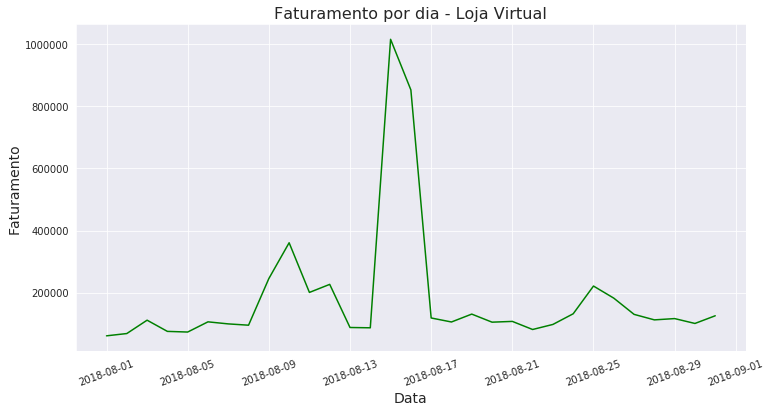

In [431]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
ax1 = sns.lineplot(x='date',y='price',data=fat_time, color='green')
ax1.set_xlabel('Data', fontsize=14)
ax1.set_ylabel('Faturamento', fontsize=14)
ax1.set_title('Faturamento por dia - Loja Virtual', fontsize=16)

for item in ax1.get_xticklabels():
    item.set_rotation(20)
    
plt.savefig('./Images/Online/Revenue-Online.jpg', bbox_inches="tight")

In [426]:
weekday_revenue = df.groupby(['weekday','deviceType']).sum().reset_index()
weekday_revenue

,weekday,deviceType,order_id,on_product_id,quantity,price
0,0,desktop,225412912254824992,224252068966750592,499,202707
1,0,mobile,245167387592124992,251799224248706112,557,227734
2,1,desktop,201062846648903168,205939078489822048,449,180452
3,1,mobile,243342252059406304,251721620646623968,543,227196
4,2,desktop,531727834181705152,513567462794766720,1139,607099
5,2,mobile,563970088158545920,545607180032523456,1207,763234
6,3,desktop,620362654618366592,619372119340702848,1355,720046
7,3,mobile,590274403856214912,581704825548963712,1272,645431
8,4,desktop,427163787841896640,415308241164289344,922,341829
9,4,mobile,563737304470784384,566077693564809280,1233,507611


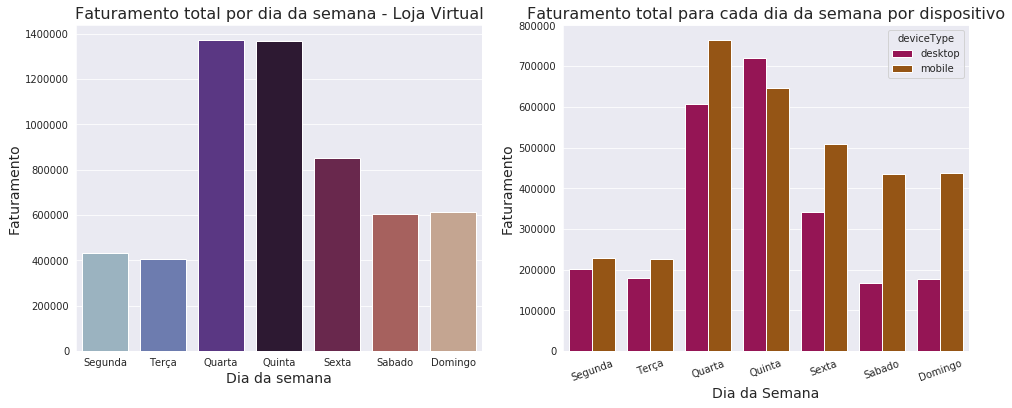

In [436]:
fig, ax = plt.subplots(1,2,figsize=(16,6),sharex=True)

ax2 = sns.barplot(x='weekday',y='price',data=df.groupby('weekday').sum().reset_index(),palette='twilight', ax=ax[0])
ax2.set_xlabel('Dia da semana', fontsize=14)
ax2.set_ylabel('Faturamento', fontsize=14)
ax2.set_title('Faturamento total por dia da semana - Loja Virtual', fontsize=16)


ax1 = sns.barplot(x='weekday',y='price',hue='deviceType',data=weekday_revenue, palette='brg')
ax1.set_xlabel('Dia da Semana', fontsize=14)
ax1.set_ylabel('Faturamento', fontsize=14)
ax1.set_title('Faturamento total para cada dia da semana por dispositivo', fontsize=16)
ax1.set_xticklabels(['Segunda','Terça','Quarta','Quinta','Sexta','Sabado','Domingo'])

for item in ax1.get_xticklabels():
    item.set_rotation(20)
    
plt.savefig('./Images/Online/Revenue-Online-Weekday.jpg', bbox_inches="tight")

**Quarta e quinta são os dias com maior faturamento (quarta o maior), sendo que quinta foi o único que houve maior arrecadação com origem em desktops e não em mobile**  
  
**Faturamento total Quarta: 1370333**  
**Faturamento total Quinta: 1365477**